In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/dataset_full.csv')

In [3]:
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [5]:
data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


In [6]:
X = data.iloc[:,:-1]
y= data.iloc[:,-1]

### Balanced Dataset

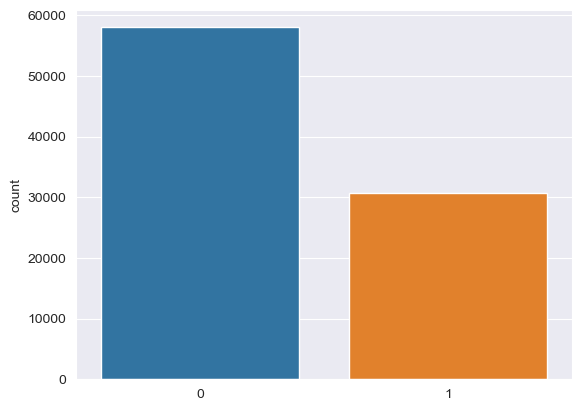

(58000, 112)
(30647, 112)


In [7]:
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.show()
print(data[data["phishing"]==0].shape)
print(data[data["phishing"]==1].shape)

In [8]:
from imblearn.over_sampling import RandomOverSampler
rdm=RandomOverSampler()
X,y=rdm.fit_resample(X,y)
data=pd.concat([X,y],axis=1)  #updating the balanced form of dataset
print(data[data["phishing"]==0].shape)
print(data[data["phishing"]==1].shape)

(58000, 112)
(58000, 112)


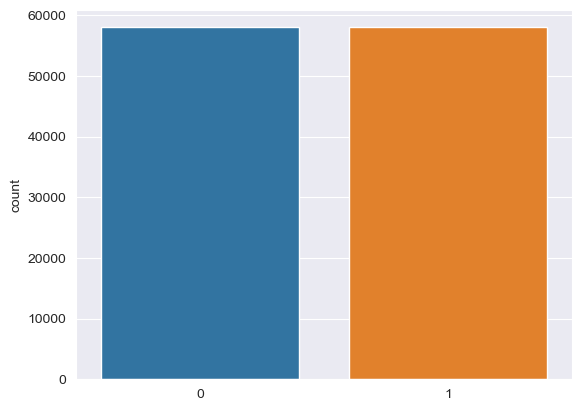

In [9]:
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.show()

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(77720, 111)
(77720,)
(38280, 111)
(38280,)


### Feature Selection

In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier

In [12]:
estimator = AdaBoostClassifier(random_state=42, n_estimators=50)
selector = SelectFromModel(estimator)
selector = selector.fit(X_train, y_train) 

In [13]:
features = np.array(X_train.columns)
print("All features: {}".format(len(X_train.columns)))
print(features) 

All features: 111
['qty_dot_url' 'qty_hyphen_url' 'qty_underline_url' 'qty_slash_url'
 'qty_questionmark_url' 'qty_equal_url' 'qty_at_url' 'qty_and_url'
 'qty_exclamation_url' 'qty_space_url' 'qty_tilde_url' 'qty_comma_url'
 'qty_plus_url' 'qty_asterisk_url' 'qty_hashtag_url' 'qty_dollar_url'
 'qty_percent_url' 'qty_tld_url' 'length_url' 'qty_dot_domain'
 'qty_hyphen_domain' 'qty_underline_domain' 'qty_slash_domain'
 'qty_questionmark_domain' 'qty_equal_domain' 'qty_at_domain'
 'qty_and_domain' 'qty_exclamation_domain' 'qty_space_domain'
 'qty_tilde_domain' 'qty_comma_domain' 'qty_plus_domain'
 'qty_asterisk_domain' 'qty_hashtag_domain' 'qty_dollar_domain'
 'qty_percent_domain' 'qty_vowels_domain' 'domain_length' 'domain_in_ip'
 'server_client_domain' 'qty_dot_directory' 'qty_hyphen_directory'
 'qty_underline_directory' 'qty_slash_directory'
 'qty_questionmark_directory' 'qty_equal_directory' 'qty_at_directory'
 'qty_and_directory' 'qty_exclamation_directory' 'qty_space_directory'
 'qt

In [14]:
status = selector.get_support()
print("Selected features:".format(len(X_train.columns)))
print(features[status])

Selected features:
['qty_slash_url' 'qty_at_url' 'qty_tld_url' 'length_url' 'qty_dot_domain'
 'qty_hyphen_domain' 'domain_length' 'qty_hyphen_directory'
 'qty_equal_directory' 'qty_dollar_directory' 'directory_length'
 'qty_percent_file' 'file_length' 'params_length' 'time_response'
 'domain_spf' 'asn_ip' 'time_domain_activation' 'qty_nameservers'
 'qty_mx_servers' 'ttl_hostname' 'tls_ssl_certificate' 'url_shortened']


In [15]:
X_train=X_train[features[status]]
X_test=X_test[features[status]]
print(X_train.columns)
print(X_test.columns)

Index(['qty_slash_url', 'qty_at_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'domain_length',
       'qty_hyphen_directory', 'qty_equal_directory', 'qty_dollar_directory',
       'directory_length', 'qty_percent_file', 'file_length', 'params_length',
       'time_response', 'domain_spf', 'asn_ip', 'time_domain_activation',
       'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'url_shortened'],
      dtype='object')
Index(['qty_slash_url', 'qty_at_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'domain_length',
       'qty_hyphen_directory', 'qty_equal_directory', 'qty_dollar_directory',
       'directory_length', 'qty_percent_file', 'file_length', 'params_length',
       'time_response', 'domain_spf', 'asn_ip', 'time_domain_activation',
       'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'url_shortened'],
      dtype='object')


In [16]:
print(len(X_train.columns),"features selected.")

23 features selected.


### Model

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score,classification_report
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.metrics import precision_recall_fscore_support

def model_report(model):
    print(confusion_matrix(y_test,model.predict(X_test)))
    print()
    print(classification_report(y_test,model.predict(X_test)))
    print()
    print('roc_auc_score: ', roc_auc_score(y_test, model.predict(X_test)))
    print("train set accuracy score :",accuracy_score(y_train,model.predict(X_train)))
    print("test set accuracy score :",  accuracy_score(y_test,model.predict(X_test)))
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, model.predict(X_test), average='binary')
    print('precision: ', precision)
    print('recall: ', recall)
    print('f1-score: ', f1_score)
    plot_roc_curve(model,X_test,y_test)

In [18]:
def model_pred(model,y_test):
    y_pred=model.predict(X_test)
    y_pred=pd.DataFrame(y_pred,columns=['Pred'],index=None)
    y_test=np.ravel(y_test)
    y_test=pd.DataFrame(y_test,columns=['Actual'],index=None)
    print(pd.concat([y_test,y_pred], axis=1))

### Logisitic Regression

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

parameter={'C':[0.0,0.5,1,1.5,2,3,5,6,7,8,8.5,9,9.5,10,30,45],'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(model,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.5, 1, 1.5, 2, 3, 5, 6, 7, 8, 8.5, 9, 9.5,
                               10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [27]:
log_regressor.best_params_

{'C': 0.5, 'penalty': 'l2'}

In [28]:
log_regressor.best_score_

0.8999356664951106

[[18092  1257]
 [ 2678 16253]]

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     19349
           1       0.93      0.86      0.89     18931

    accuracy                           0.90     38280
   macro avg       0.90      0.90      0.90     38280
weighted avg       0.90      0.90      0.90     38280


roc_auc_score:  0.8967871533944116
train set accuracy score : 0.8945959855892949
test set accuracy score : 0.8972048066875653
precision:  0.9282124500285551
recall:  0.8585389044424488
f1-score:  0.8920172333360775
       Actual  Pred
0           1     1
1           1     1
2           1     1
3           0     0
4           1     1
...       ...   ...
38275       0     0
38276       0     0
38277       1     1
38278       1     0
38279       0     0

[38280 rows x 2 columns]


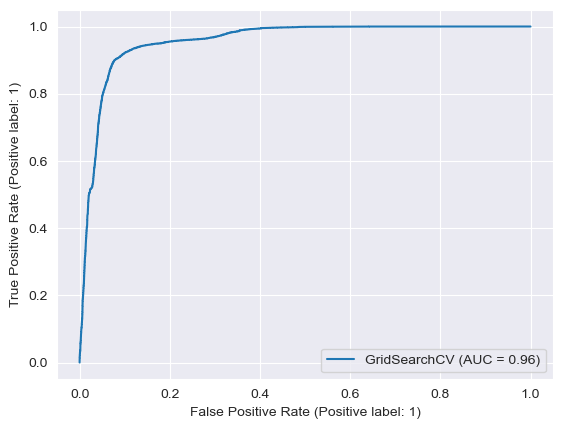

In [29]:
model_report(log_regressor)
model_pred(log_regressor,y_test)

### Random Forest

In [30]:
parameter = { 
    'n_estimators': [50,100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,10,15,20],
    'criterion' :['gini', 'entropy']
}

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

rf_model=GridSearchCV(model,parameter,scoring='accuracy',cv=5)
rf_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [32]:
rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 100}

In [33]:
rf_model.best_score_

0.9763381369016984

[[18748   601]
 [  253 18678]]

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19349
           1       0.97      0.99      0.98     18931

    accuracy                           0.98     38280
   macro avg       0.98      0.98      0.98     38280
weighted avg       0.98      0.98      0.98     38280


roc_auc_score:  0.9777873200929657
train set accuracy score : 0.9982629953679877
test set accuracy score : 0.9776907001044932
precision:  0.9688261839307017
recall:  0.9866356769320163
f1-score:  0.977649829887464
       Actual  Pred
0           1     1
1           1     1
2           1     1
3           0     0
4           1     1
...       ...   ...
38275       0     0
38276       0     0
38277       1     1
38278       1     1
38279       0     0

[38280 rows x 2 columns]


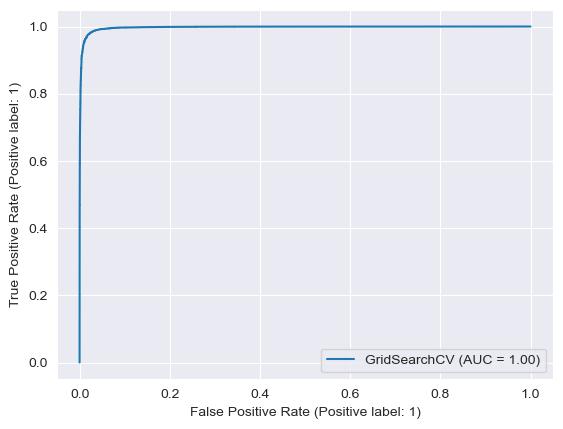

In [34]:
model_report(rf_model)
model_pred(rf_model,y_test)

### Gradient Boosting

In [35]:
parameters = {'n_estimators': [150,200,250,500],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [5,10,15]}

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)

gb_model = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
gb_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [150, 200, 250, 500]},
             scoring='accuracy')

In [37]:
gb_model.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}

In [38]:
gb_model.best_score_

0.9798636129696346

[[18870   479]
 [  250 18681]]

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19349
           1       0.97      0.99      0.98     18931

    accuracy                           0.98     38280
   macro avg       0.98      0.98      0.98     38280
weighted avg       0.98      0.98      0.98     38280


roc_auc_score:  0.9810191729163109
train set accuracy score : 0.9999356664951107
test set accuracy score : 0.9809561128526646
precision:  0.975
recall:  0.986794147166024
f1-score:  0.98086162085532
       Actual  Pred
0           1     1
1           1     1
2           1     1
3           0     0
4           1     1
...       ...   ...
38275       0     0
38276       0     0
38277       1     1
38278       1     1
38279       0     0

[38280 rows x 2 columns]


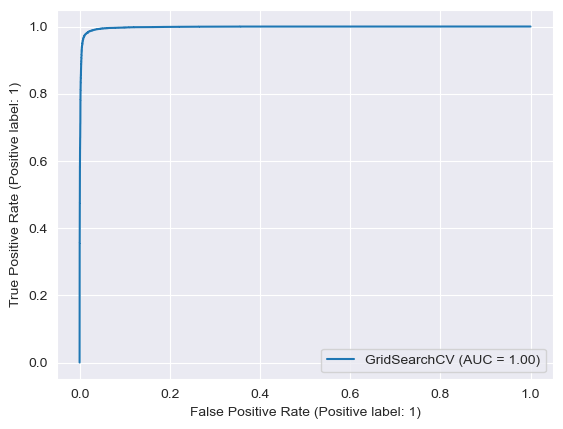

In [39]:
model_report(gb_model)
model_pred(gb_model,y_test)

### XGBoost Classifier

In [19]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.1, 1.0],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

model = XGBClassifier()
xgb_model = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
xgb_model.fit(X_train, y_train)